In [207]:
import numpy as np
import matplotlib.pyplot as plt

En esta sección solo correr una de las funciones con sus respectivos parámetros, haciendo un cambio a Code (tecla Y) cuando se use, y a Markdown (tecla M) cuando no:

1. Esfera

2. Rosenbrok

3. Himmelblau's

4. Eggholder

# Esfera 
def funcion(x):
    return np.sum(x**2)

m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales=3        # número de decimales
n = 5              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5        # número de etapas  

# Rosenbrok
def funcion(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales = 3      # número de decimales
n = 5              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100 # número de generaciones
etapas = 5         # número de etapas  

In [208]:
# Himmelblau's
def funcion(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

m = 14             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -5            # valor mínimo de x
b = 5             # valor máximo de x
decimales = 3      # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5         # número de etapas  


In [209]:
# Eggholder
def funcion(x,y):
    term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
    term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
    return -(y + 47) * term1 - x * term2

m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5        # número de etapas  

In [210]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [211]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [212]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


En ésta parte también se diferencia la evaluación de la función.

In [213]:
# Esfera y Rosenbrock
def eva_funcion(ind, a, b, m, decimales):
    x= deco_ind(ind, a, b, m, decimales)
    return funcion(x)

In [214]:
# Himmelblau's y Eggholder
def eva_funcion(ind, a, b, m, decimales):
    x,y= deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [215]:
def torneo(pob, m, a, b, decimales, epsilon):
    idx1 = np.random.randint(0, len(pob))
    idx2 = np.random.randint(0, len(pob))

    f1 = eva_funcion(pob[idx1],m, a, b, decimales)
    f2 = eva_funcion(pob[idx2],m, a, b, decimales)

    if f1 < f2:
        return pob[idx1], idx1
    else:
        return pob[idx2], idx2

In [216]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [217]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [218]:
def AG_etapas_torneo(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
                     etapas, generaciones):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    total_generacion = 0
    h = []      # Historial de la mejor evaluación en cada generación
    h_pp = []  # Historial del promedio de evaluaciones en cada generación
    
    elite = int(np.ceil(0.2 * pob_size))
    
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            total_generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[evaluar.index(mejor_ahora)]

            if total_generacion % 10 == 0:
                print(f"Generación {total_generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")
            
            # elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]
            
            
            new_pob_elite = []
            while len(new_pob_elite) < (pob_size - elite):
                padre1, _ = torneo(pob, m, a, b, decimales, epsilon)
                padre2, _ = torneo(pob, m, a, b, decimales, epsilon)
                
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                
                new_pob_elite.append(hijo1)
                if len(new_pob_elite) < (pob_size - elite):
                    new_pob_elite.append(hijo2)
            
            pob = np.array(new_pob_elite + elite_idx)
        print(f"Fin de la Etapa {eta+1}: Mejor en etapa: {round(min(eta_h), decimales)} | Promedio etapa: {round(np.mean(eta_h_pp), decimales)}")
    
    return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp

Iteración 1

=== Etapa 1 ===
Generación 10 - Mejor: -937.325 | Promedio: -365.42
Generación 20 - Mejor: -953.82 | Promedio: -730.607
Generación 30 - Mejor: -953.823 | Promedio: -709.844
Generación 40 - Mejor: -953.884 | Promedio: -768.95
Generación 50 - Mejor: -953.907 | Promedio: -698.53
Generación 60 - Mejor: -953.911 | Promedio: -867.187
Generación 70 - Mejor: -953.912 | Promedio: -806.428
Generación 80 - Mejor: -953.912 | Promedio: -736.403
Generación 90 - Mejor: -953.912 | Promedio: -744.027
Generación 100 - Mejor: -953.912 | Promedio: -608.57
Fin de la Etapa 1: Mejor en etapa: -953.912 | Promedio etapa: -661.719

=== Etapa 2 ===
Generación 110 - Mejor: -953.912 | Promedio: -774.275
Generación 120 - Mejor: -953.912 | Promedio: -743.519
Generación 130 - Mejor: -954.035 | Promedio: -802.602
Generación 140 - Mejor: -954.035 | Promedio: -609.693
Generación 150 - Mejor: -954.035 | Promedio: -757.414
Generación 160 - Mejor: -954.035 | Promedio: -662.901
Generación 170 - Mejor: -954.035 

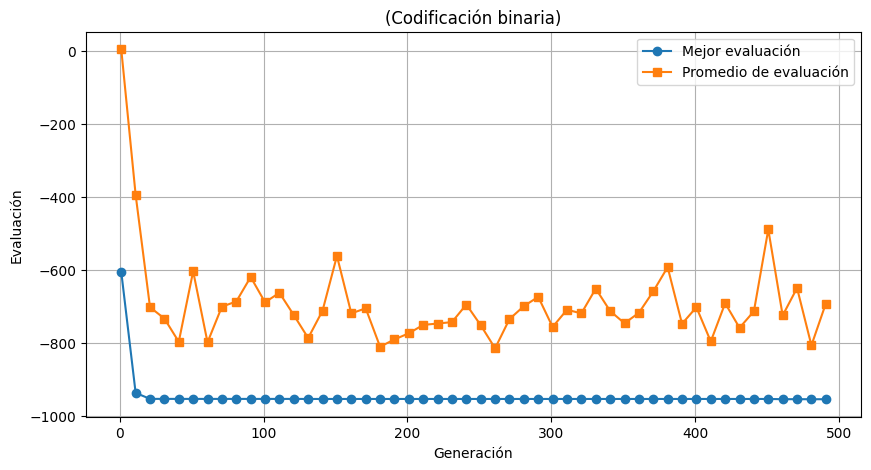

Iteración 2

=== Etapa 1 ===
Generación 10 - Mejor: -832.624 | Promedio: -571.195
Generación 20 - Mejor: -857.898 | Promedio: -656.901
Generación 30 - Mejor: -858.028 | Promedio: -743.938
Generación 40 - Mejor: -858.117 | Promedio: -660.981
Generación 50 - Mejor: -858.124 | Promedio: -709.365
Generación 60 - Mejor: -858.124 | Promedio: -699.586
Generación 70 - Mejor: -858.125 | Promedio: -726.388
Generación 80 - Mejor: -858.125 | Promedio: -696.708
Generación 90 - Mejor: -858.125 | Promedio: -734.417
Generación 100 - Mejor: -858.125 | Promedio: -650.485
Fin de la Etapa 1: Mejor en etapa: -858.125 | Promedio etapa: -671.337

=== Etapa 2 ===
Generación 110 - Mejor: -858.125 | Promedio: -637.669
Generación 120 - Mejor: -858.125 | Promedio: -671.574
Generación 130 - Mejor: -858.125 | Promedio: -751.092
Generación 140 - Mejor: -858.125 | Promedio: -709.476
Generación 150 - Mejor: -858.125 | Promedio: -749.188
Generación 160 - Mejor: -858.125 | Promedio: -739.129
Generación 170 - Mejor: -858

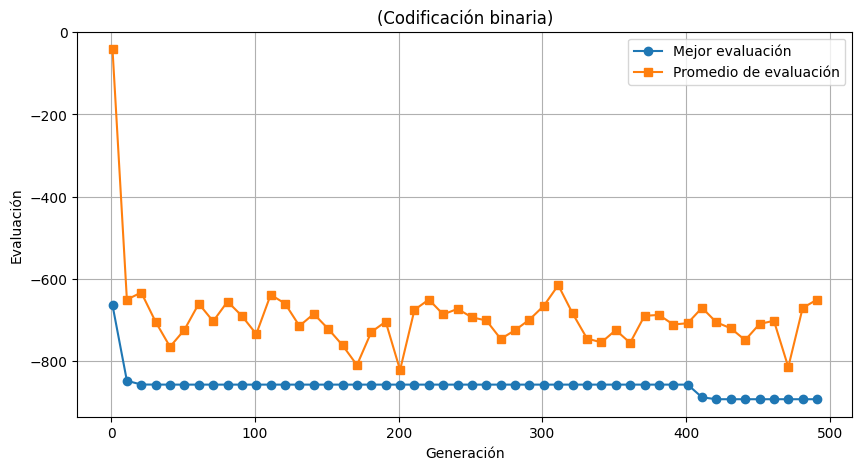

Iteración 3

=== Etapa 1 ===
Generación 10 - Mejor: -880.38 | Promedio: -441.767
Generación 20 - Mejor: -889.596 | Promedio: -579.665
Generación 30 - Mejor: -894.053 | Promedio: -852.683
Generación 40 - Mejor: -894.237 | Promedio: -768.458
Generación 50 - Mejor: -894.238 | Promedio: -778.415
Generación 60 - Mejor: -894.238 | Promedio: -661.914
Generación 70 - Mejor: -894.238 | Promedio: -663.107
Generación 80 - Mejor: -894.238 | Promedio: -678.727
Generación 90 - Mejor: -894.238 | Promedio: -717.405
Generación 100 - Mejor: -894.238 | Promedio: -732.737
Fin de la Etapa 1: Mejor en etapa: -894.238 | Promedio etapa: -679.382

=== Etapa 2 ===
Generación 110 - Mejor: -894.238 | Promedio: -724.449
Generación 120 - Mejor: -894.238 | Promedio: -705.046
Generación 130 - Mejor: -894.238 | Promedio: -676.465
Generación 140 - Mejor: -894.238 | Promedio: -757.898
Generación 150 - Mejor: -894.238 | Promedio: -703.329
Generación 160 - Mejor: -894.238 | Promedio: -829.972
Generación 170 - Mejor: -894.

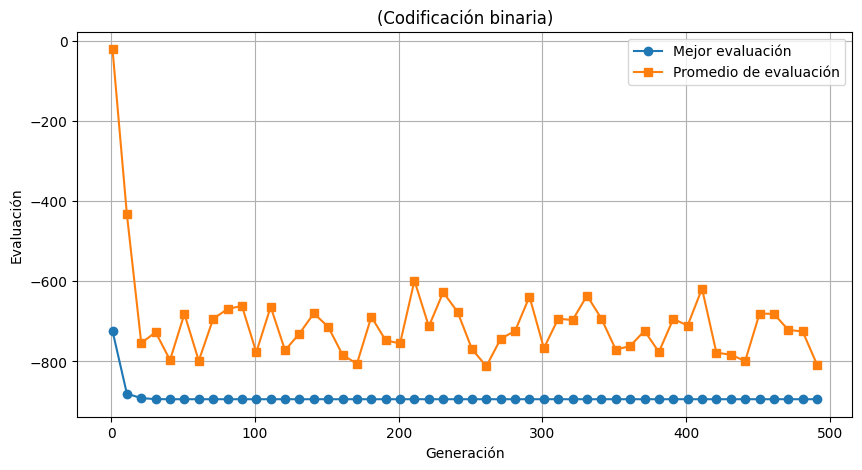

Iteración 4

=== Etapa 1 ===
Generación 10 - Mejor: -930.675 | Promedio: -617.613
Generación 20 - Mejor: -933.799 | Promedio: -796.188
Generación 30 - Mejor: -935.191 | Promedio: -794.338
Generación 40 - Mejor: -935.227 | Promedio: -751.651
Generación 50 - Mejor: -935.282 | Promedio: -798.157
Generación 60 - Mejor: -935.288 | Promedio: -727.491
Generación 70 - Mejor: -935.29 | Promedio: -772.004
Generación 80 - Mejor: -935.292 | Promedio: -845.771
Generación 90 - Mejor: -935.293 | Promedio: -772.519
Generación 100 - Mejor: -935.293 | Promedio: -836.62
Fin de la Etapa 1: Mejor en etapa: -935.293 | Promedio etapa: -740.559

=== Etapa 2 ===
Generación 110 - Mejor: -935.293 | Promedio: -791.085
Generación 120 - Mejor: -935.293 | Promedio: -817.206
Generación 130 - Mejor: -935.293 | Promedio: -808.324
Generación 140 - Mejor: -935.293 | Promedio: -859.721
Generación 150 - Mejor: -935.293 | Promedio: -812.29
Generación 160 - Mejor: -935.293 | Promedio: -850.757
Generación 170 - Mejor: -935.29

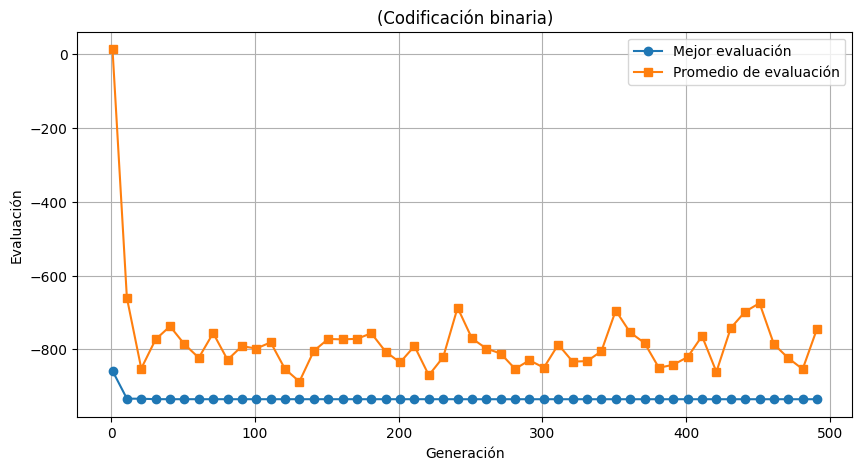

Iteración 5

=== Etapa 1 ===
Generación 10 - Mejor: -891.217 | Promedio: -741.6
Generación 20 - Mejor: -894.428 | Promedio: -699.581
Generación 30 - Mejor: -894.578 | Promedio: -694.298
Generación 40 - Mejor: -894.578 | Promedio: -773.252
Generación 50 - Mejor: -894.578 | Promedio: -672.188
Generación 60 - Mejor: -894.578 | Promedio: -729.95
Generación 70 - Mejor: -894.578 | Promedio: -754.254
Generación 80 - Mejor: -894.578 | Promedio: -721.851
Generación 90 - Mejor: -894.578 | Promedio: -732.188
Generación 100 - Mejor: -894.578 | Promedio: -793.598
Fin de la Etapa 1: Mejor en etapa: -894.578 | Promedio etapa: -694.789

=== Etapa 2 ===
Generación 110 - Mejor: -894.578 | Promedio: -667.958
Generación 120 - Mejor: -894.578 | Promedio: -702.602
Generación 130 - Mejor: -894.579 | Promedio: -707.106
Generación 140 - Mejor: -894.579 | Promedio: -684.769
Generación 150 - Mejor: -894.579 | Promedio: -756.551
Generación 160 - Mejor: -894.579 | Promedio: -801.993
Generación 170 - Mejor: -894.57

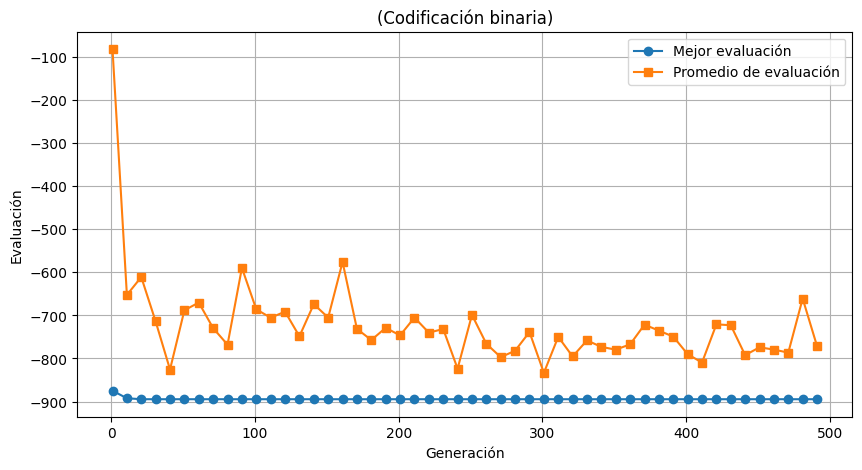

In [219]:
print("Iteración 1")
def main():
    mejor_ind, mejor_apt, total_generacion, h, h_pp = AG_etapas_torneo(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones)
    
    print("\nResultado final:")
    print("Total de generaciones:", total_generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))
    
    
    gen_indices = np.arange(1, len(h)+1)
    gen_indices_thinned = gen_indices[::10]
    h_thinned = np.array(h)[::10]
    h_pp_thinned = np.array(h_pp)[::10]
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen_indices_thinned, h_thinned, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(gen_indices_thinned, h_pp_thinned, marker='s', linestyle='-', label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("(Codificación binaria)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()
    print("Iteración 2")
if __name__ == "__main__":
    main()
    print("Iteración 3")
if __name__ == "__main__":
    main()
    print("Iteración 4")
if __name__ == "__main__":
    main()
    print("Iteración 5")
if __name__ == "__main__":
    main()            